In [1]:
import pandas as pd

vendas_df = pd.read_csv("vendas.csv")
display (vendas_df)

,ID da Venda,Data da Venda,Produto,Categoria,Preço Unitário,Quantidade,Cidade,Estado
0,1,2024-05-28,Camisa Social,Roupas,138.11,3,Rio de Janeiro,RJ
1,2,2023-10-23,Casaco,Roupas,129.28,3,Rio de Janeiro,RJ
2,3,2023-08-19,Moletom,Roupas,91.22,5,Porto Alegre,RS
3,4,2024-06-18,Camisa Social,Roupas,146.40,2,Goiânia,GO
4,5,2024-03-17,Tênis,Calçados,186.93,4,Rio de Janeiro,RJ
...,...,...,...,...,...,...,...,...
2995,2996,2024-05-21,Bermuda,Roupas,70.88,5,Recife,PE
2996,2997,2024-01-10,Camiseta,Roupas,33.86,3,Porto Alegre,RS
2997,2998,2024-07-01,Casaco,Roupas,31.58,2,Recife,PE
2998,2999,2023-12-17,Vestido,Roupas,173.54,1,Salvador,BA


Verificando campos vazios

In [58]:
print(vendas_df.isnull().sum())


ID da Venda       0
Data da Venda     0
Produto           0
Categoria         0
Preço Unitário    0
Quantidade        0
Cidade            0
Estado            0
dtype: int64


Convertendo Data

In [62]:
vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'])
display (vendas_df)

,ID da Venda,Data da Venda,Produto,Categoria,Preço Unitário,Quantidade,Cidade,Estado
0,1,2024-05-28,Camisa Social,Roupas,138.11,3,Rio de Janeiro,RJ
1,2,2023-10-23,Casaco,Roupas,129.28,3,Rio de Janeiro,RJ
2,3,2023-08-19,Moletom,Roupas,91.22,5,Porto Alegre,RS
3,4,2024-06-18,Camisa Social,Roupas,146.40,2,Goiânia,GO
4,5,2024-03-17,Tênis,Calçados,186.93,4,Rio de Janeiro,RJ
...,...,...,...,...,...,...,...,...
2995,2996,2024-05-21,Bermuda,Roupas,70.88,5,Recife,PE
2996,2997,2024-01-10,Camiseta,Roupas,33.86,3,Porto Alegre,RS
2997,2998,2024-07-01,Casaco,Roupas,31.58,2,Recife,PE
2998,2999,2023-12-17,Vestido,Roupas,173.54,1,Salvador,BA


Calcular o valor total de cada venda (Preço Unitário * Quantidade):

In [63]:
vendas_df ['Valor Total Vendido'] = vendas_df ['Preço Unitário'] * vendas_df ['Quantidade']
display (vendas_df)

,ID da Venda,Data da Venda,Produto,Categoria,Preço Unitário,Quantidade,Cidade,Estado,Valor Total Vendido
0,1,2024-05-28,Camisa Social,Roupas,138.11,3,Rio de Janeiro,RJ,414.33
1,2,2023-10-23,Casaco,Roupas,129.28,3,Rio de Janeiro,RJ,387.84
2,3,2023-08-19,Moletom,Roupas,91.22,5,Porto Alegre,RS,456.10
3,4,2024-06-18,Camisa Social,Roupas,146.40,2,Goiânia,GO,292.80
4,5,2024-03-17,Tênis,Calçados,186.93,4,Rio de Janeiro,RJ,747.72
...,...,...,...,...,...,...,...,...,...
2995,2996,2024-05-21,Bermuda,Roupas,70.88,5,Recife,PE,354.40
2996,2997,2024-01-10,Camiseta,Roupas,33.86,3,Porto Alegre,RS,101.58
2997,2998,2024-07-01,Casaco,Roupas,31.58,2,Recife,PE,63.16
2998,2999,2023-12-17,Vestido,Roupas,173.54,1,Salvador,BA,173.54


Produto mais vendido:

In [6]:

produto_mais_vendido = vendas_df.groupby('Produto')['Quantidade'].sum().idxmax()
display(f"Produto mais vendido: {produto_mais_vendido}")


'Produto mais vendido: Moletom'

Categoria com maior receita total:

In [7]:

receita_por_categoria = vendas_df.groupby('Categoria')['Valor Total Vendido'].sum()
categoria_mais_lucrativa = receita_por_categoria.idxmax()
print(f"Categoria com maior receita: {categoria_mais_lucrativa}")


Categoria com maior receita: Roupas


Média de gasto por venda em cada cidade:


In [64]:
media_gasto_por_cidade = vendas_df.groupby('Cidade')['Valor Total Vendido'].mean().round(2)

media_gasto_formatado = media_gasto_por_cidade.apply(lambda x: f"${x:,.2f}")


print(media_gasto_formatado.to_string())


Cidade
Belo Horizonte    $323.90
Curitiba          $326.23
Fortaleza         $338.71
Goiânia           $334.95
Manaus            $314.80
Porto Alegre      $325.17
Recife            $320.61
Rio de Janeiro    $356.88
Salvador          $312.99
São Paulo         $324.46


Gráfico de barras mostrando a evolução das vendas ao longo dos meses:

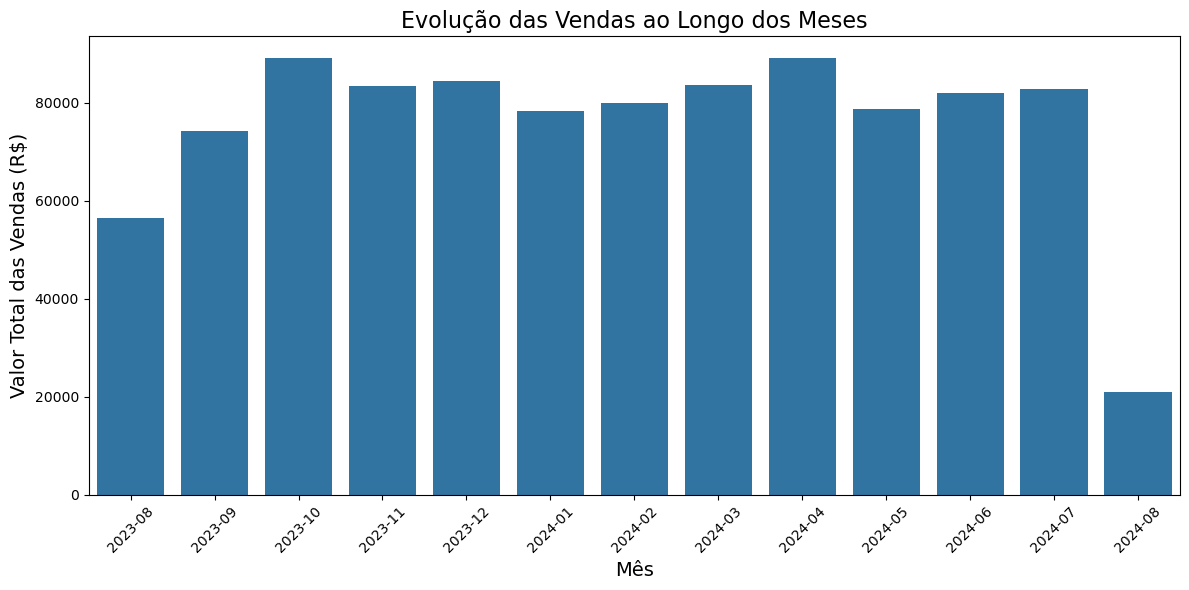

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



vendas_df['Data da Venda'] = pd.to_datetime(vendas_df['Data da Venda'], errors='coerce')


if vendas_df['Data da Venda'].isnull().any():
    print("Houve erros na conversão de datas. Algumas datas são inválidas.")


vendas_df['Mês'] = vendas_df['Data da Venda'].dt.to_period('M')


if 'Valor Total' not in vendas_df.columns:
    vendas_df['Valor Total'] = vendas_df['Preço Unitário'] * vendas_df['Quantidade']


vendas_por_mes = vendas_df.groupby('Mês')['Valor Total'].sum().reset_index()


vendas_por_mes['Mês'] = vendas_por_mes['Mês'].astype(str)


plt.figure(figsize=(12, 6))
sns.barplot(data=vendas_por_mes, x='Mês', y='Valor Total')  # Removido o argumento palette


plt.title('Evolução das Vendas ao Longo dos Meses', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Valor Total das Vendas (R$)', fontsize=14)
plt.xticks(rotation=45)  


plt.tight_layout()
plt.show()


Grafico em pizza

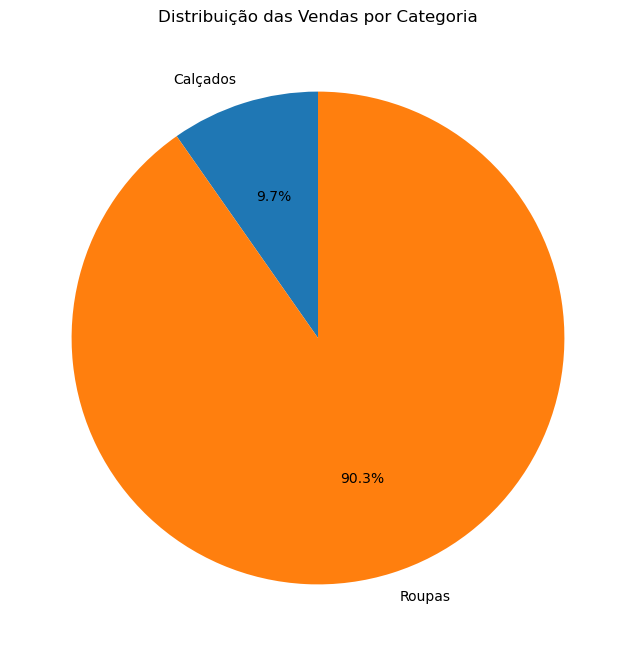

In [145]:

vendas_por_categoria = vendas_df.groupby('Categoria')['Valor Total'].sum()


plt.figure(figsize=(8, 8))
plt.pie(vendas_por_categoria, labels=vendas_por_categoria.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribuição das Vendas por Categoria")
plt.show()


Vendas detalhada de produtos de cada cidade

In [73]:
faturamento_por_produto = vendas_df [['Cidade' , 'Produto' , 'Valor Total Vendido']].groupby(['Cidade' , 'Produto']).sum()
pd.set_option('display.max_rows', None)

display (faturamento_por_produto)

Valor Total Vendido
Cidade         Produto                           
Belo Horizonte Bermuda                    8125.76
               Blusa                      7976.77
               Calça Jeans               12395.75
               Camisa Social              7515.96
               Camiseta                  11379.51
               Casaco                     5922.41
               Moletom                   11309.41
               Saia                       7899.00
               Tênis                      4998.98
               Vestido                   12195.81
Curitiba       Bermuda                   14848.04
               Blusa                     11028.51
               Calça Jeans                9845.57
               Camisa Social              5641.72
               Camiseta                   7891.35
               Casaco                    12624.93
               Moletom                   13515.61
               Saia                      11295.60
               Tênis                      7521.26
               Vestido                   12790.55
Fortaleza      Bermuda                    9328.29
               Blusa                     10934.95
               Calça Jeans               10432.20
               Camisa Social             11420.37
               Camiseta                  10614.02
               Casaco                     6261.90
               Moletom                   14580.37
               Saia                       8546.90
               Tênis                     12685.69
               Vestido                    5454.38
Goiânia        Bermuda                   10005.25
               Blusa                      8213.30
               Calça Jeans                8131.01
               Camisa Social              8729.74
               Camiseta                  10364.55
               Casaco                    10457.54
               Moletom                   13343.36
               Saia                      11140.89
               Tênis                      9157.10
               Vestido                   12618.53
Manaus         Bermuda                    8805.45
               Blusa                      8547.10
               Calça Jeans               10496.21
               Camisa Social              7432.06
               Camiseta                  10991.31
               Casaco                     8787.74
               Moletom                    9060.23
               Saia                      13848.71
               Tênis                     10759.48
               Vestido                   13266.08
Porto Alegre   Bermuda                    5402.46
               Blusa                      8940.85
               Calça Jeans                9681.59
               Camisa Social             12894.88
               Camiseta                  13565.84
               Casaco                    15636.50
               Moletom                    8970.96
               Saia                       9148.07
               Tênis                      8590.03
               Vestido                    8295.99
Recife         Bermuda                    8600.52
               Blusa                      5864.19
               Calça Jeans               10831.18
               Camisa Social              9462.67
               Camiseta                  10831.75
               Casaco                     7146.01
               Moletom                    9664.36
               Saia                      10679.30
               Tênis                      9830.94
               Vestido                    5897.53
Rio de Janeiro Bermuda                   11986.89
               Blusa                      6711.39
               Calça Jeans                7375.69
               Camisa Social              9524.91
               Camiseta                  11876.52
               Casaco                    10569.05
               Moletom                   12360.71
               Saia                       7239.27
               Tênis          